<a href="https://colab.research.google.com/github/CsCheems/popular-songs/blob/master/modelo_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules

In [42]:
#cargamos el archivo local
from google.colab import files
archivo = files.upload()

for filename in archivo.keys():
  print(filename)

#leemos el archivo cargado
df = pd.read_csv("spotify.csv")
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [43]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'speechiness']
df = df.dropna(subset=features)

df_bin = pd.DataFrame()
for col in features:
    if col == 'tempo':
        threshold = df[col].mean()
        df_bin[f'{col}_high'] = df[col] > threshold
    else:
        df_bin[f'{col}_high'] = df[col] > 0.7
        df_bin[f'{col}_low'] = df[col] < 0.3

In [44]:
frequent_items = apriori(df_bin, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
306,"(valence_low, acousticness_high, energy_low)",(speechiness_low),0.061649,0.996738,1.038658
124,"(valence_low, energy_low)",(speechiness_low),0.072561,0.994470,1.036294
130,"(acousticness_high, energy_low)",(speechiness_low),0.099289,0.990462,1.032118
7,(danceability_low),(speechiness_low),0.078114,0.987908,1.029456
69,"(valence_low, danceability_low)",(speechiness_low),0.060939,0.986650,1.028145
20,(energy_low),(speechiness_low),0.117193,0.985396,1.026839
348,"(acousticness_low, tempo_high, valence_high, e...",(speechiness_low),0.059026,0.983053,1.024398
237,"(energy_high, tempo_high, valence_high)",(speechiness_low),0.076386,0.979528,1.020724
251,"(acousticness_low, valence_high, energy_high)",(speechiness_low),0.100667,0.978847,1.020014
113,"(acousticness_low, energy_high)",(speechiness_low),0.396149,0.973004,1.013926


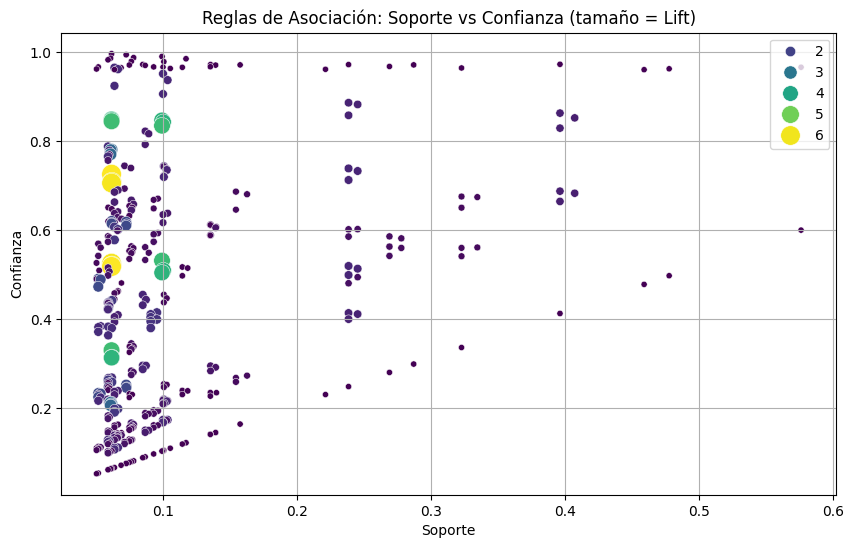

In [45]:
#Dispersion
plt.figure(figsize=(10,6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, sizes=(20, 200), hue="lift", palette="viridis")
plt.title("Reglas de Asociación: Soporte vs Confianza (tamaño = Lift)")
plt.xlabel("Soporte")
plt.ylabel("Confianza")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

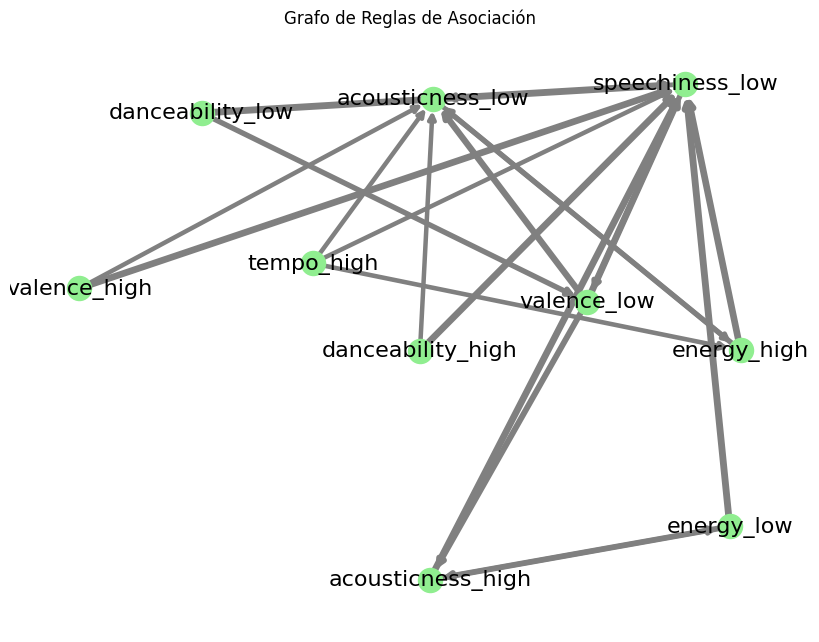

In [51]:
#Grafos
G = nx.DiGraph()
for i in range(min(100, len(rules))):
    antecedente = list(rules.iloc[i]['antecedents'])[0]
    consecuente = list(rules.iloc[i]['consequents'])[0]
    confidence = rules.iloc[i]['confidence']
    G.add_edge(antecedente, consecuente, weight=confidence)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [d['weight']*5 for (u,v,d) in edges]

nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', width=weights, font_size=16)
plt.title("Grafo de Reglas de Asociación")
plt.show()